In [1]:
import seaborn as sns
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
pwd

'C:\\Users\\Edgard_Cuadra\\OneDrive\\Desktop\\Ironhack\\Projects\\My_Proyect'

In [3]:
sharkattack = pd.read_csv('.\\Input\\attacks.csv', encoding='latin1')

In [4]:
sharkattack.head()

Case Number       Date    Year        Type    Country             Area  \
0  2018.06.25  25-Jun-18  2018.0     Boating        USA       California   
1  2018.06.18  18-Jun-18  2018.0  Unprovoked        USA          Georgia   
2  2018.06.09   9-Jun-18  2018.0     Invalid        USA           Hawaii   
3  2018.06.08   8-Jun-18  2018.0  Unprovoked  AUSTRALIA  New South Wales   
4  2018.06.04   4-Jun-18  2018.0    Provoked     MEXICO           Colima   

                         Location     Activity             Name Sex   ...  \
0     Oceanside, San Diego County     Paddling      Julie Wolfe    F  ...   
1  St. Simon Island, Glynn County     Standing  Adyson McNeely     F  ...   
2                    Habush, Oahu      Surfing      John Denges    M  ...   
3              Arrawarra Headland      Surfing             male    M  ...   
4                        La Ticla  Free diving   Gustavo Ramos     M  ...   

          Species           Investigator or Source                       pdf  \
0      White shark                R. Collier, GSAF      2018.06.25-Wolfe.pdf   
1              NaN  K.McMurray, TrackingSharks.com    2018.06.18-McNeely.pdf   
2              NaN  K.McMurray, TrackingSharks.com     2018.06.09-Denges.pdf   
3        2 m shark                  B. Myatt, GSAF  2018.06.08-Arrawarra.pdf   
4  Tiger shark, 3m                       A .Kipper      2018.06.04-Ramos.pdf   

                                        href formula  \
0  http://sharkattackfile.net/spreadsheets/pdf_di...   
1  http://sharkattackfile.net/spreadsheets/pdf_di...   
2  http://sharkattackfile.net/spreadsheets/pdf_di...   
3  http://sharkattackfile.net/spreadsheets/pdf_di...   
4  http://sharkattackfile.net/spreadsheets/pdf_di...   

                                                href Case Number.1  \
0  http://sharkattackfile.net/spreadsheets/pdf_di...    2018.06.25   
1  http://sharkattackfile.net/spreadsheets/pdf_di...    2018.06.18   
2  http://sharkattackfile.net/spreadsheets/pdf_di...    2018.06.09   
3  http://sharkattackfile.net/spreadsheets/pdf_di...    2018.06.08   
4  http://sharkattackfile.net/spreadsheets/pdf_di...    2018.06.04   

  Case Number.2 original order Unnamed: 22 Unnamed: 23  
0    2018.06.25         6303.0         NaN         NaN  
1    2018.06.18         6302.0         NaN         NaN  
2    2018.06.09         6301.0         NaN         NaN  
3    2018.06.08         6300.0         NaN         NaN  
4    2018.06.04         6299.0         NaN         NaN  

[5 rows x 24 columns]

In [5]:
sharkattack.shape

(25723, 24)

#### note: when evaluating it was shown that 76% of the 25k rows had no entry whatsoever. thus, proceeded to drop all the null values leaving a new data frame with the shape of 6309 rows that 

In [6]:
Sharkattack76 = sharkattack.dropna(subset=["original order"])

In [7]:
Sharkattack76.shape

(6309, 24)

In [8]:
Sharkattack76.sample(3)

Case Number            Date    Year        Type       Country  \
199     2016.11.14       14-Nov-16  2016.0  Unprovoked           USA   
3277  1974.02.00.a  Early Feb-1974  1974.0        Boat  SOUTH AFRICA   
6112    1817.06.24     24-Jun-1817  1817.0  Unprovoked           USA   

                       Area                              Location  \
199                  Hawaii            Kamaole Beach Park I, Maui   
3277  Western Cape Province                              Macassar   
6112         South Carolina  Charleston Harbor, Charleston County   

             Activity                                        Name Sex   ...  \
199          Floating                             Barbara Zawacki    F  ...   
3277  Fishing for kob  skiboat, occupants: Danie & Fanie Schoeman  NaN  ...   
6112         Swimming                                       Jemmy    M  ...   

         Species  Investigator or Source                        pdf  \
199   Tiger shark  Maui News, 11/14/2016     2016.11.14-Zawacki.pdf   
3277  White shark   T. Wallett, pp.35-37  1974.02.00.a-Schoeman.pdf   
6112          NaN   The Times, 6/25/1817       1817.06.24-Jemmy.pdf   

                                           href formula  \
199   http://sharkattackfile.net/spreadsheets/pdf_di...   
3277  http://sharkattackfile.net/spreadsheets/pdf_di...   
6112  http://sharkattackfile.net/spreadsheets/pdf_di...   

                                                   href Case Number.1  \
199   http://sharkattackfile.net/spreadsheets/pdf_di...    2016.11.14   
3277  http://sharkattackfile.net/spreadsheets/pdf_di...  1974.02.00.a   
6112  http://sharkattackfile.net/spreadsheets/pdf_di...    1817.06.24   

     Case Number.2 original order Unnamed: 22 Unnamed: 23  
199     2016.11.14         6104.0         NaN         NaN  
3277  1974.02.00.a         3026.0         NaN         NaN  
6112    1817.06.24          191.0         NaN         NaN  

[3 rows x 24 columns]

#### note: Checking what the percentage of missing values per column is to have a better understanding of what columns have usefull data.

In [9]:
percent_missing = Sharkattack76.isnull().sum()/(sharkattack.count()+Sharkattack76.isnull().sum())*100

In [10]:
percent_missing

Case Number                0.011490
Date                       0.110953
Year                       0.142653
Type                       0.174354
Country                    0.903471
Area                       7.322872
Location                   8.670154
Activity                   8.733555
Name                       3.439531
Sex                        9.066413
Age                       44.983357
Injury                     0.554763
Fatal (Y/N)                8.654303
Time                      53.273102
Species                   45.094310
Investigator or Source     0.380409
pdf                        0.110953
href formula               0.126803
href                       0.110953
Case Number.1              0.110953
Case Number.2              0.110953
original order             0.000000
Unnamed: 22               99.984150
Unnamed: 23               99.968299
dtype: float64

#### note: noticed that the column href has a correct assorment of the date except for 140 lines, which tabulates to the 2% of missing values, will proceed to creat cells for year, month, day

In [11]:
get_date = "\d{4}\.\d{2}\.\d{2}"

In [12]:
Sharkattack76["date2"] = Sharkattack76["href"].apply(lambda x: re.findall(get_date, str(x)))
Sharkattack76.sample()

C:\Users\Edgard_Cuadra\AppData\Local\Temp\ipykernel_21972\4026330070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sharkattack76["date2"] = Sharkattack76["href"].apply(lambda x: re.findall(get_date, str(x)))


Case Number      Date    Year        Type    Country        Area  \
318  2016.01.05  5-Jan-16  2016.0  Unprovoked  AUSTRALIA  Queensland   

         Location Activity           Name Sex   ... Investigator or Source  \
318  Heron Island   Wading  Nicolas Davis    M  ...    Nine News, 1/5/2016   

                      pdf                                       href formula  \
318  2016.01.05-Davis.pdf  http://sharkattackfile.net/spreadsheets/pdf_di...   

                                                  href Case Number.1  \
318  http://sharkattackfile.net/spreadsheets/pdf_di...    2016.01.05   

    Case Number.2 original order Unnamed: 22 Unnamed: 23         date2  
318    2016.01.05         5985.0         NaN         NaN  [2016.01.05]  

[1 rows x 25 columns]

In [13]:
Sharkattack76["Dates Clean"] = Sharkattack76["date2"].explode()
Sharkattack76.sample(3)

C:\Users\Edgard_Cuadra\AppData\Local\Temp\ipykernel_21972\708661480.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sharkattack76["Dates Clean"] = Sharkattack76["date2"].explode()


Case Number                  Date    Year        Type Country  \
2792  1987.00.00.a                  1987  1987.0        Boat   ITALY   
1611    2005.02.16             16-Feb-05  2005.0  Unprovoked     USA   
3730  1963.11.16.R  Reported 16-Nov-1963  1963.0  Unprovoked   ITALY   

                Area                           Location      Activity  \
2792  Tyrrhenian Sea      Marciana Marina, Isola d'Elba          Boat   
1611          Hawaii  Rocky Point, north shore of O'ahu       Surfing   
3730          Sicily            Off Mondello Lighthouse  Spearfishing   

                                    Name Sex   ...  \
2792  Aniello Mattera and Giorgio Allori    M  ...   
1611                           Greg Long    M  ...   
3730                          Dr. Salito    M  ...   

                                       pdf  \
2792  1987.00.00.a-boat-Mattera-Allori.pdf   
1611                   2005.02.16-Long.pdf   
3730               1963.11.16.R-Salito.pdf   

                                           href formula  \
2792  http://sharkattackfile.net/spreadsheets/pdf_di...   
1611  http://sharkattackfile.net/spreadsheets/pdf_di...   
3730  http://sharkattackfile.net/spreadsheets/pdf_di...   

                                                   href Case Number.1  \
2792  http://sharkattackfile.net/spreadsheets/pdf_di...  1987.00.00.a   
1611  http://sharkattackfile.net/spreadsheets/pdf_di...    2005.02.16   
3730  http://sharkattackfile.net/spreadsheets/pdf_di...  1963.11.16.R   

     Case Number.2 original order Unnamed: 22 Unnamed: 23         date2  \
2792  1987.00.00.a         3511.0         NaN         NaN  [1987.00.00]   
1611    2005.02.16         4692.0         NaN         NaN  [2005.02.16]   
3730  1963.11.16.R         2573.0         NaN         NaN  [1963.11.16]   

     Dates Clean  
2792  1987.00.00  
1611  2005.02.16  
3730  1963.11.16  

[3 rows x 26 columns]

In [14]:
Sharkattack76[["Year", "Month", "Day"]] = Sharkattack76["Dates Clean"].str.split(".", expand=True)
Sharkattack76.sample(3)

C:\Users\Edgard_Cuadra\AppData\Local\Temp\ipykernel_21972\398272458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sharkattack76[["Year", "Month", "Day"]] = Sharkattack76["Dates Clean"].str.split(".", expand=True)
C:\Users\Edgard_Cuadra\AppData\Local\Temp\ipykernel_21972\398272458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sharkattack76[["Year", "Month", "Day"]] = Sharkattack76["Dates Clean"].str.split(".", expand=True)
C:\Users\Edgard_Cuadra\AppData\Local\Temp\ipykernel_21972\398272458.py:1: 

Case Number       Date  Year        Type    Country           Area  \
2753    1988.01.21  21-Jan-88  1988     Invalid  AUSTRALIA  Torres Strait   
2990  1982.02.14.b  14-Feb-82  1982  Unprovoked        USA         Hawaii   
6242       ND.0064      1960s   NaN  Unprovoked       IRAQ         Basrah   

                                      Location  \
2753                                       NaN   
2990  White Plains Beach, Barbers Point, O'ahu   
6242                      Shatt-al-Arab River    

                                               Activity          Name Sex   \
2753  Fell overboard  from the Taiwanese fishing tra...  Lo-Ying-Chun    M   
2990                                             Wading   Lisa Miller    F   
6242  Swimming naked near a date palm where many dat...          male    M   

      ...                                               href Case Number.1  \
2753  ...  http://sharkattackfile.net/spreadsheets/pdf_di...    1988.01.21   
2990  ...  http://sharkattackfile.net/spreadsheets/pdf_di...  1982.02.14.b   
6242  ...  http://sharkattackfile.net/spreadsheets/pdf_di...       ND.0064   

     Case Number.2 original order Unnamed: 22 Unnamed: 23         date2  \
2753    1988.01.21         3550.0         NaN         NaN  [1988.01.21]   
2990  1982.02.14.b         3313.0         NaN         NaN  [1982.02.14]   
6242       ND.0064           61.0         NaN         NaN            []   

     Dates Clean Month  Day  
2753  1988.01.21    01   21  
2990  1982.02.14    02   14  
6242         NaN   NaN  NaN  

[3 rows x 28 columns]

In [15]:
Sharkattack76.sample(5)

Case Number                  Date  Year        Type     Country  \
5358  1913.07.10.R  Reported 10-Jul-1913  1913  Unprovoked  COSTA RICA   
994     2010.08.29             29-Aug-10  2010     Invalid     BAHAMAS   
4159    1958.06.15             15-Jun-58  1958     Invalid   AUSTRALIA   
4251    1956.06.22           22-Jun-1956  1956     Boating    PORTUGAL   
4795    1939.07.14             14-Jul-39  1939    Provoked         USA   

               Area                               Location  \
5358            NaN                             Port Limon   
994   Exuma Islands  Off Jaws Beach, New Providence Island   
4159     Queensland                           Green Island   
4251        Madeira                            Off Funchal   
4795          Texas      West Bay, 19 miles from Galveston   

                                 Activity                            Name  \
5358                             Swimming   August Schulke & Karl Schafer   
994   Swimming after boat became disabled                   Judson Newton   
4159                             Swimming  Alva Colquhoun &  Ilsa Konrads   
4251                     Longling fishing                  Manuel Pereira   
4795                        Seine netting                    John Bolling   

     Sex   ...                                               href  \
5358    M  ...  http://sharkattackfile.net/spreadsheets/pdf_di...   
994     M  ...  http://sharkattackfile.net/spreadsheets/pdf_di...   
4159    F  ...  http://sharkattackfile.net/spreadsheets/pdf_di...   
4251    M  ...  http://sharkattackfile.net/spreadsheets/pdf_di...   
4795    M  ...  http://sharkattackfile.net/spreadsheets/pdf_di...   

     Case Number.1 Case Number.2 original order Unnamed: 22 Unnamed: 23  \
5358  1913.17.10.R  1913.07.10.R          945.0         NaN         NaN   
994     2010.08.29    2010.08.29         5309.0         NaN         NaN   
4159    1958.06.15    1958.06.15         2144.0         NaN         NaN   
4251    1956.06.22    1956.06.22         2052.0         NaN         NaN   
4795    1939.07.14    1939.07.14         1508.0         NaN         NaN   

             date2 Dates Clean Month Day  
5358  [1913.07.10]  1913.07.10    07  10  
994   [2010.08.29]  2010.08.29    08  29  
4159  [1958.06.15]  1958.06.15    06  15  
4251  [1956.06.22]  1956.06.22    06  22  
4795  [1939.07.14]  1939.07.14    07  14  

[5 rows x 28 columns]

In [16]:
Sharkattack76.isnull().sum()

Case Number                  1
Date                         7
Year                       140
Type                        11
Country                     57
Area                       462
Location                   547
Activity                   551
Name                       217
Sex                        572
Age                       2838
Injury                      35
Fatal (Y/N)                546
Time                      3361
Species                   2845
Investigator or Source      24
pdf                          7
href formula                 8
href                         7
Case Number.1                7
Case Number.2                7
original order               0
Unnamed: 22               6308
Unnamed: 23               6307
date2                        0
Dates Clean                140
Month                      140
Day                        140
dtype: int64

#### note: this was used to drop cells that had no usefull information

In [17]:
Sharkattack76.drop(["Unnamed: 22", "Unnamed: 23","date2","Dates Clean", "Case Number.1", "Case Number.2"],axis=1, inplace=True)


C:\Users\Edgard_Cuadra\AppData\Local\Temp\ipykernel_21972\2180160936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sharkattack76.drop(["Unnamed: 22", "Unnamed: 23","date2","Dates Clean", "Case Number.1", "Case Number.2"],axis=1, inplace=True)


In [18]:
Sharkattack76.drop(["pdf","href","href formula","Date"],axis=1, inplace=True)
Sharkattack76.sample(3)

C:\Users\Edgard_Cuadra\AppData\Local\Temp\ipykernel_21972\1880028450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sharkattack76.drop(["pdf","href","href formula","Date"],axis=1, inplace=True)


Case Number  Year        Type       Country                   Area  \
2962  1982.09.30.a  1982  Unprovoked  SOUTH AFRICA  Eastern Cape Province   
518     2014.08.09  2014  Unprovoked           USA                Florida   
4597  1946.07.18.a  1946  Unprovoked          IRAN     Khuzestan Province   

                                            Location   Activity  \
2962                             Nahoon, East London    Surfing   
518   Lori Wilson Park, Cocoa Beach, Brevard  County   Swimming   
4597  Ahvaz, on the Karun River, 275 km from the sea  Swimming    

               Name Sex  Age  \
2962  Howard Fawkes    M  16   
518   Krama Fordham    F  10   
4597          Mehdi    M  12   

                                                 Injury Fatal (Y/N)   Time  \
2962                        No Injury, surfboard bitten           N  14h50   
518               Puncture wounds to right foot & ankle           N  13h30   
4597  Left Achilles tendon severed, calf muscles sev...           N    NaN   

                                            Species   \
2962  Believed to involve a 2.8 m [9'3"] white shark   
518                                              NaN   
4597                              Possibly C. leucas   

                                 Investigator or Source  original order Month  \
2962  M. Levine, GSAF; R. Horn, E.L. Aquarium; T. Wa...          3341.0    09   
518                             Florida Today, 8/9/2014          5785.0    08   
4597      A. Anderson, M.D. / Lt. Col. R.S. Hunt , p.84          1706.0    07   

     Day  
2962  30  
518   09  
4597  18

In [19]:
Sharkattack76.isnull().sum()

Case Number                  1
Year                       140
Type                        11
Country                     57
Area                       462
Location                   547
Activity                   551
Name                       217
Sex                        572
Age                       2838
Injury                      35
Fatal (Y/N)                546
Time                      3361
Species                   2845
Investigator or Source      24
original order               0
Month                      140
Day                        140
dtype: int64

In [20]:
Sharkattack76.shape

(6309, 18)

In [21]:
percent_missing = Sharkattack76.isnull().sum()/(Sharkattack76.count()+Sharkattack76.isnull().sum())*100
percent_missing

Case Number                0.015850
Year                       2.219052
Type                       0.174354
Country                    0.903471
Area                       7.322872
Location                   8.670154
Activity                   8.733555
Name                       3.439531
Sex                        9.066413
Age                       44.983357
Injury                     0.554763
Fatal (Y/N)                8.654303
Time                      53.273102
Species                   45.094310
Investigator or Source     0.380409
original order             0.000000
Month                      2.219052
Day                        2.219052
dtype: float64

#### note: the columns "Injury","Species","County" need better legibility, will proceed to clean this cells to extract useful information.

In [22]:
get_shark = "(\w{3,})?( Shark| shark|Shark|shark)"

In [23]:
Sharkattack76["Sharkspe1"] = Sharkattack76["Species "].apply(lambda x: re.findall(get_shark, str(x)))
Sharkattack76.sample(3)

C:\Users\Edgard_Cuadra\AppData\Local\Temp\ipykernel_21972\239238655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sharkattack76["Sharkspe1"] = Sharkattack76["Species "].apply(lambda x: re.findall(get_shark, str(x)))


Case Number  Year        Type      Country            Area  \
1841    2002.07.20  2002  Unprovoked          USA  North Carolina   
810   2012.03.06.b  2012  Unprovoked  NEW ZEALAND    North Island   
5290    1917.05.31  1917  Unprovoked  PHILIPPINES    Luzon Island   

                           Location  Activity  \
1841  Emerald Isle, Carteret County  Swimming   
810               Opunake, Taranake   Surfing   
5290                    Canacao Bay  Swimming   

                                       Name Sex   Age  \
1841                  Mary Katherine Strong    F   15   
810                           Peter Garrett    M  NaN   
5290  E.E., water tender of the U.S.S. Dale    M  NaN   

                                Injury Fatal (Y/N)   Time  \
1841                       Calf bitten           N  17h00   
810           Lacerations to left calf           N  19h00   
5290  FATAL, abdominal cavity removed            Y  17h45   

                                    Species   \
1841  Bull shark, 1.8 m to 2.1 m [6' to 7']    
810                                      NaN   
5290                                     NaN   

                                 Investigator or Source  original order Month  \
1841                                  C. Creswell, GSAF          4462.0    07   
810                                 NZ Herald, 3/7/2012          5493.0    03   
5290  P.F. Prioleau; W.E., p.195; V.M. Coppleson (19...          1013.0    05   

     Day         Sharkspe1  
1841  20  [(Bull,  shark)]  
810   06                []  
5290  31                []

#### Note: need a way for the columns to not be in a list and joing the sharks names into the column

In [24]:
Sharkattack76["shark"] = Sharkattack76["Sharkspe1"].explode()

C:\Users\Edgard_Cuadra\AppData\Local\Temp\ipykernel_21972\414043935.py:1: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  Sharkattack76["shark"] = Sharkattack76["Sharkspe1"].explode()


ValueError: cannot reindex on an axis with duplicate labels

In [25]:
Sharkattack76.sample(3)

Case Number  Year        Type    Country            Area  \
468   2014.12.28.a  2014    Provoked  AUSTRALIA        Victoria   
621   2013.09.21.a  2013  Unprovoked        USA         Florida   
3070    1980.03.28  1980  Unprovoked     BRAZIL  Rio de Janeiro   

                                     Location  Activity           Name Sex   \
468                            Paradise Beach   Fishing           male    M   
621   Carlin Park, Jupiter, Palm Beach County   Surfing  Brandon Dugan    M   
3070         Copacabana Beach, Rio de Janiero  Swimming           J.M.    M   

      Age                                             Injury Fatal (Y/N)  \
468   40s  Laceration to calf when he fell on shark he ha...           N   
621   NaN                         Lacerations to left foream           N   
3070  NaN                                   Right leg bitten           N   

           Time     Species   Investigator or Source  original order Month  \
468     Morning  1.5 m shark  ABC.net.au, 12/28/2014          5835.0    12   
621     Morning          NaN          News Channel 5          5682.0    09   
3070  Afternoon    2 m shark             M. Szpilman          3233.0    03   

     Day     Sharkspe1  
468   28  [(,  shark)]  
621   21            []  
3070  28  [(,  shark)]

#### Note: started cleaning Age column

In [26]:
Sharkattack76["Age"].unique()

array(['57', '11', '48', nan, '18', '52', '15', '12', '32', '10', '21',
       '34', '30', '60', '33', '29', '54', '41', '37', '56', '19', '25',
       '69', '38', '55', '35', '46', '45', '14', '40s', '28', '20', '24',
       '26', '49', '22', '7', '31', '17', '40', '13', '42', '3', '8',
       '50', '16', '82', '73', '20s', '68', '51', '39', '58', 'Teen',
       '47', '61', '65', '36', '66', '43', '60s', '9', '72', '59', '6',
       '27', '64', '23', '71', '44', '62', '63', '70', '18 months', '53',
       '30s', '50s', 'teen', '77', '74', '28 & 26', '5', '86', '18 or 20',
       '12 or 13', '46 & 34', '28, 23 & 30', 'Teens', '36 & 26',
       '8 or 10', '84', '\xa0 ', ' ', '30 or 36', '6½', '21 & ?', '75',
       '33 or 37', 'mid-30s', '23 & 20', '7      &    31', '20?', "60's",
       '32 & 30', '16 to 18', '87', '67', 'Elderly', 'mid-20s', 'Ca. 33',
       '21 or 26', '>50', '18 to 22', 'adult', '9 & 12', '? & 19',
       '9 months', '25 to 35', '23 & 26', '1', '(adult)', '33 & 37',

In [27]:
Sharkattack76["Age"] = Sharkattack76["Age"].replace(["18 months"],["1.5"])

C:\Users\Edgard_Cuadra\AppData\Local\Temp\ipykernel_21972\3281533344.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sharkattack76["Age"] = Sharkattack76["Age"].replace(["18 months"],["1.5"])


In [28]:
Sharkattack76["Age"].unique()

array(['57', '11', '48', nan, '18', '52', '15', '12', '32', '10', '21',
       '34', '30', '60', '33', '29', '54', '41', '37', '56', '19', '25',
       '69', '38', '55', '35', '46', '45', '14', '40s', '28', '20', '24',
       '26', '49', '22', '7', '31', '17', '40', '13', '42', '3', '8',
       '50', '16', '82', '73', '20s', '68', '51', '39', '58', 'Teen',
       '47', '61', '65', '36', '66', '43', '60s', '9', '72', '59', '6',
       '27', '64', '23', '71', '44', '62', '63', '70', '1.5', '53', '30s',
       '50s', 'teen', '77', '74', '28 & 26', '5', '86', '18 or 20',
       '12 or 13', '46 & 34', '28, 23 & 30', 'Teens', '36 & 26',
       '8 or 10', '84', '\xa0 ', ' ', '30 or 36', '6½', '21 & ?', '75',
       '33 or 37', 'mid-30s', '23 & 20', '7      &    31', '20?', "60's",
       '32 & 30', '16 to 18', '87', '67', 'Elderly', 'mid-20s', 'Ca. 33',
       '21 or 26', '>50', '18 to 22', 'adult', '9 & 12', '? & 19',
       '9 months', '25 to 35', '23 & 26', '1', '(adult)', '33 & 37',
     

#### Function to replace values in the columns:

In [29]:
def Replace (column,source,output):
    s = source
    o = output
    c = column
    Sharkattack76[c] = Sharkattack76[c].replace([s],[o])
    pass
    

In [30]:
#### Clean column AGE

In [31]:
Replace("Age","2 to 3 months","0.3")

C:\Users\Edgard_Cuadra\AppData\Local\Temp\ipykernel_21972\3857129365.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sharkattack76[c] = Sharkattack76[c].replace([s],[o])


In [32]:
Replace("Age","10 or 12","11")

C:\Users\Edgard_Cuadra\AppData\Local\Temp\ipykernel_21972\3857129365.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sharkattack76[c] = Sharkattack76[c].replace([s],[o])


In [33]:
Sharkattack76["Age"].unique()

array(['57', '11', '48', nan, '18', '52', '15', '12', '32', '10', '21',
       '34', '30', '60', '33', '29', '54', '41', '37', '56', '19', '25',
       '69', '38', '55', '35', '46', '45', '14', '40s', '28', '20', '24',
       '26', '49', '22', '7', '31', '17', '40', '13', '42', '3', '8',
       '50', '16', '82', '73', '20s', '68', '51', '39', '58', 'Teen',
       '47', '61', '65', '36', '66', '43', '60s', '9', '72', '59', '6',
       '27', '64', '23', '71', '44', '62', '63', '70', '1.5', '53', '30s',
       '50s', 'teen', '77', '74', '28 & 26', '5', '86', '18 or 20',
       '12 or 13', '46 & 34', '28, 23 & 30', 'Teens', '36 & 26',
       '8 or 10', '84', '\xa0 ', ' ', '30 or 36', '6½', '21 & ?', '75',
       '33 or 37', 'mid-30s', '23 & 20', '7      &    31', '20?', "60's",
       '32 & 30', '16 to 18', '87', '67', 'Elderly', 'mid-20s', 'Ca. 33',
       '21 or 26', '>50', '18 to 22', 'adult', '9 & 12', '? & 19',
       '9 months', '25 to 35', '23 & 26', '1', '(adult)', '33 & 37',
     

#### previous method took too long, decided to strip string, drop Na and set to integers

In [34]:
Sharkattack76['Age_Clean'] = Sharkattack76['Age'].str.extract("([0-9]+)", expand=False).dropna().astype(int)

C:\Users\Edgard_Cuadra\AppData\Local\Temp\ipykernel_21972\3164651739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sharkattack76['Age_Clean'] = Sharkattack76['Age'].str.extract("([0-9]+)", expand=False).dropna().astype(int)


In [35]:
Sharkattack76["Age_Clean"].unique()

array([57., 11., 48., nan, 18., 52., 15., 12., 32., 10., 21., 34., 30.,
       60., 33., 29., 54., 41., 37., 56., 19., 25., 69., 38., 55., 35.,
       46., 45., 14., 40., 28., 20., 24., 26., 49., 22.,  7., 31., 17.,
       13., 42.,  3.,  8., 50., 16., 82., 73., 68., 51., 39., 58., 47.,
       61., 65., 36., 66., 43.,  9., 72., 59.,  6., 27., 64., 23., 71.,
       44., 62., 63., 70.,  1., 53., 77., 74.,  5., 86., 84., 75., 87.,
       67.,  0., 81., 78.,  2.])

#### Histogram of Age once clean

In [36]:
Sharkattack76.Age_Clean.value_counts()

17.0    156
18.0    152
20.0    151
19.0    143
15.0    139
       ... 
87.0      1
84.0      1
86.0      1
82.0      1
2.0       1
Name: Age_Clean, Length: 82, dtype: int64

In [37]:
Sharkattack76.isnull().sum()

Case Number                  1
Year                       140
Type                        11
Country                     57
Area                       462
Location                   547
Activity                   551
Name                       217
Sex                        572
Age                       2838
Injury                      35
Fatal (Y/N)                546
Time                      3361
Species                   2845
Investigator or Source      24
original order               0
Month                      140
Day                        140
Sharkspe1                    0
Age_Clean                 2868
dtype: int64

<AxesSubplot:xlabel='Age_Clean', ylabel='Count'>

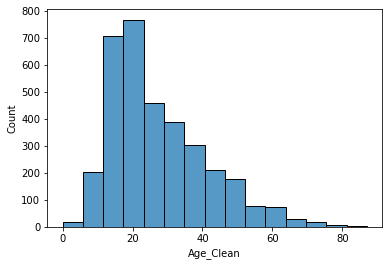

In [38]:
sns.histplot(x=Sharkattack76.Age_Clean,bins=15)

In [39]:
Sharkattack76.sample(3)

Case Number  Year        Type       Country                   Area  \
3104    1979.03.01  1979        Boat  SOUTH AFRICA  Western Cape Province   
398   2015.06.30.b  2015  Unprovoked     AUSTRALIA        New South Wales   
690     2013.03.31  2013     Invalid     AUSTRALIA        New South Wales   

              Location Activity              Name Sex   Age  \
3104       Seal Island      NaN      Fishing boat  NaN  NaN   
398   Flat Rock, Yamba  Surfing             Steve    M  NaN   
690     Terrigal Beach  Surfing  Richard Tognetti    M   47   

                              Injury Fatal (Y/N) Time              Species   \
3104                       No Injury           N  NaN                   NaN   
398                      Hand bitten           N  NaN                   NaN   
690   Never happened; it was a  hoax         NaN  NaN  No shark involvement   

            Investigator or Source  original order Month Day     Sharkspe1  \
3104                          GSAF          3199.0    03  01            []   
398        The Telegraph, 7/8/2015          5905.0    06  30            []   
690   Limelight Magazine, 4/1/2013          5613.0    03  31  [(,  shark)]   

      Age_Clean  
3104        NaN  
398         NaN  
690        47.0

#### Cleaning the column of Sex

In [40]:
Sharkattack76["Sex "].value_counts()

M      5094
F       637
M         2
N         2
lli       1
.         1
Name: Sex , dtype: int64

In [41]:
Replace("Sex ","M ","M")

C:\Users\Edgard_Cuadra\AppData\Local\Temp\ipykernel_21972\3857129365.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sharkattack76[c] = Sharkattack76[c].replace([s],[o])


In [42]:
Replace("Sex ","lli",np.NaN)

C:\Users\Edgard_Cuadra\AppData\Local\Temp\ipykernel_21972\3857129365.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sharkattack76[c] = Sharkattack76[c].replace([s],[o])


In [43]:
Replace("Sex ","N",np.NaN)

C:\Users\Edgard_Cuadra\AppData\Local\Temp\ipykernel_21972\3857129365.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sharkattack76[c] = Sharkattack76[c].replace([s],[o])


In [44]:
Replace("Sex ",".",np.NaN)

C:\Users\Edgard_Cuadra\AppData\Local\Temp\ipykernel_21972\3857129365.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sharkattack76[c] = Sharkattack76[c].replace([s],[o])


In [45]:
Sharkattack76["Sex "].value_counts()

M    5096
F     637
Name: Sex , dtype: int64

#### Cleaning the column of fatalities

In [46]:
Sharkattack76["Fatal (Y/N)"].value_counts()

N          4293
Y          1388
UNKNOWN      71
 N            7
M             1
2017          1
N             1
y             1
Name: Fatal (Y/N), dtype: int64

In [47]:
Replace("Fatal (Y/N)"," N","N")

C:\Users\Edgard_Cuadra\AppData\Local\Temp\ipykernel_21972\3857129365.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sharkattack76[c] = Sharkattack76[c].replace([s],[o])


In [48]:
Replace("Fatal (Y/N)","N ","N")

C:\Users\Edgard_Cuadra\AppData\Local\Temp\ipykernel_21972\3857129365.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sharkattack76[c] = Sharkattack76[c].replace([s],[o])


In [49]:
Replace("Fatal (Y/N)","y","Y")

C:\Users\Edgard_Cuadra\AppData\Local\Temp\ipykernel_21972\3857129365.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sharkattack76[c] = Sharkattack76[c].replace([s],[o])


In [50]:
Replace("Fatal (Y/N)","2017","")

C:\Users\Edgard_Cuadra\AppData\Local\Temp\ipykernel_21972\3857129365.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sharkattack76[c] = Sharkattack76[c].replace([s],[o])


In [51]:
Replace("Fatal (Y/N)","M","N")

C:\Users\Edgard_Cuadra\AppData\Local\Temp\ipykernel_21972\3857129365.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sharkattack76[c] = Sharkattack76[c].replace([s],[o])


In [52]:
Replace("Fatal (Y/N)","","UNKNOWN")

C:\Users\Edgard_Cuadra\AppData\Local\Temp\ipykernel_21972\3857129365.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sharkattack76[c] = Sharkattack76[c].replace([s],[o])


In [53]:
Sharkattack76["Fatal (Y/N)"].value_counts()

N          4302
Y          1389
UNKNOWN      72
Name: Fatal (Y/N), dtype: int64

#### Cleaning the column of Types

In [54]:
Sharkattack76["Type"].value_counts()

Unprovoked      4595
Provoked         574
Invalid          547
Sea Disaster     239
Boating          203
Boat             137
Questionable       2
Boatomg            1
Name: Type, dtype: int64

In [55]:
Replace("Type","Boat","Boating")

C:\Users\Edgard_Cuadra\AppData\Local\Temp\ipykernel_21972\3857129365.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sharkattack76[c] = Sharkattack76[c].replace([s],[o])


In [56]:
Replace("Type","Boatomg","Boating")

C:\Users\Edgard_Cuadra\AppData\Local\Temp\ipykernel_21972\3857129365.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sharkattack76[c] = Sharkattack76[c].replace([s],[o])


In [57]:
Replace("Type","Questionable","Invalid")

C:\Users\Edgard_Cuadra\AppData\Local\Temp\ipykernel_21972\3857129365.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sharkattack76[c] = Sharkattack76[c].replace([s],[o])


In [58]:
Replace("Type","","")

C:\Users\Edgard_Cuadra\AppData\Local\Temp\ipykernel_21972\3857129365.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sharkattack76[c] = Sharkattack76[c].replace([s],[o])


In [59]:
Sharkattack76["Type"].value_counts()

Unprovoked      4595
Provoked         574
Invalid          549
Boating          341
Sea Disaster     239
Name: Type, dtype: int64

#### Cleaning the column of Country

In [60]:
Sharkattack76["Country"] = Sharkattack76["Country"].str.title()

C:\Users\Edgard_Cuadra\AppData\Local\Temp\ipykernel_21972\150914458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sharkattack76["Country"] = Sharkattack76["Country"].str.title()


##### made the text all in proper capitalization

In [61]:
Sharkattack76["Country"] = Sharkattack76["Country"].str.strip()

C:\Users\Edgard_Cuadra\AppData\Local\Temp\ipykernel_21972\3612209787.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sharkattack76["Country"] = Sharkattack76["Country"].str.strip()


##### Stripped the spaces at the biggining and end


In [62]:
Sharkattack76["Country"].value_counts()

Usa                           2229
Australia                     1338
South Africa                   579
Papua New Guinea               134
New Zealand                    128
                              ... 
British Virgin Islands           1
Gabon                            1
Andaman / Nicobar Islandas       1
Maldive Islands                  1
Ceylon (Sri Lanka)               1
Name: Country, Length: 201, dtype: int64

In [63]:
Sharkattack76["Country"].count()

6252

<AxesSubplot:title={'center':'Incidents per country'}>

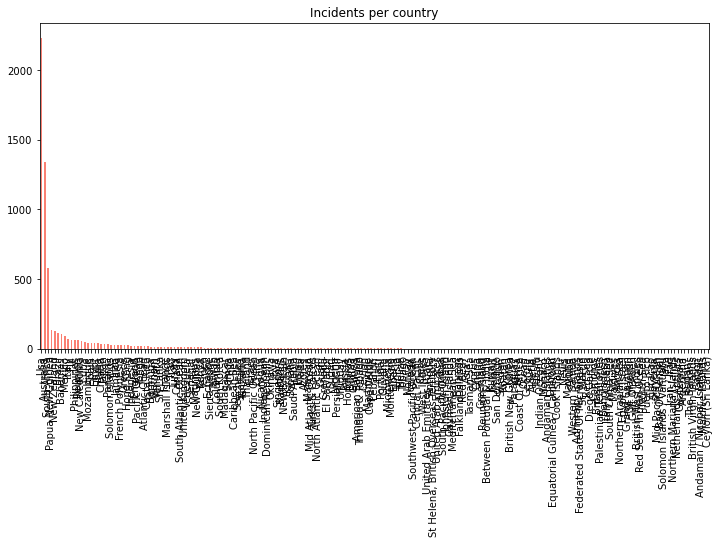

In [64]:
Sharkattack76["Country"].value_counts().plot(kind="bar", color="salmon", figsize=(12,6), title="Incidents per country")


Should use the top 30 countries that have 88% of the incidents of attacks, to make the graph more visible and understandable.

#### Cleaning the column of Activity

In [65]:
def ActivityClean(string):
    """Cleans the strings of text and converts it to useful simplifications"""
    string = str(string).lower().strip()
    if string != string:
        return np.nan
    elif "swimming" in string or"bathing" in string or "floating" in string or "splashing" in string or "jumped into the water" in string or "playing" in string:
        return "swimming"
    elif "diving" in string or "snorkel" in string:
        return "diving"
    elif "fishing" in string:
        return "fishing"
    elif "surf" in string or "body boarding" in string or "body-boarding" in string or "boogie boarding" in string or "paddleskiing" in string:
        return "surf"
    elif "standing" in string:
        return "standing"
    elif "kayaking" in string or "ship" in string or "sail" in string or "boat" in string or "canoeing" in string or "board" in string or "rowing" in string or "fell into the water" in string:
        return "boating"
    elif "disaster" in string:
        return "sea disaster"
    elif "wading" in string or "walking" in string or "treading water" in string:
        return "walking"
    else:
        return np.nan

In [66]:
Sharkattack76.Activity = Sharkattack76.Activity.apply(ActivityClean)
Sharkattack76.sample(3)

C:\Users\Edgard_Cuadra\AppData\Local\Temp\ipykernel_21972\631096087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sharkattack76.Activity = Sharkattack76.Activity.apply(ActivityClean)


Case Number  Year        Type    Country            Area  \
1908  2001.09.03.a  2001  Unprovoked        Usa  North Carolina   
4952    1933.11.20  1933  Unprovoked  Australia   Torres Strait   
6300       ND.0002   NaN  Unprovoked     Panama             NaN   

                                             Location  Activity  \
1908  Avon, Hatteras Island, Outer Banks, Dare County  swimming   
4952                                 Near Boydong Cay    diving   
6300                             Panama Bay 8ºN, 79ºW       NaN   

                               Name Sex   Age  \
1908  Natalia (Natasha) Slobonskaya    F   23   
4952                 Bili, a Papuan    M  NaN   
6300                Jules Patterson    M  NaN   

                                    Injury Fatal (Y/N)   Time  \
1908          Left buttock & foot  severed           N  18h00   
4952  FATAL, right buttock & thigh bitten            Y    NaN   
6300                                 FATAL           Y    NaN   

                                               Species   \
1908  A large white shark was filmed by divers on a ...   
4952                          Tiger shark, 3.4 m [11']    
6300                                                NaN   

           Investigator or Source  original order Month  Day  \
1908  M. Levine, GSAF                      4395.0    09   03   
4952      Cairns Post, 11/29/1933          1351.0    11   20   
6300          The Sun, 10/20/1938             3.0   NaN  NaN   

              Sharkspe1  Age_Clean  
1908  [(white,  shark)]       23.0  
4952  [(Tiger,  shark)]        NaN  
6300                 []        NaN

In [67]:
Sharkattack76["Activity"] = Sharkattack76["Activity"].str.title()

C:\Users\Edgard_Cuadra\AppData\Local\Temp\ipykernel_21972\807001204.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sharkattack76["Activity"] = Sharkattack76["Activity"].str.title()


In [69]:
Sharkattack76["Activity"].value_counts()

Swimming        1398
Surf            1307
Fishing         1115
Diving           667
Boating          394
Walking          214
Standing         128
Sea Disaster      29
Name: Activity, dtype: int64

In [71]:
Sharkattack76.drop(["Case Number","Time"],axis=1, inplace=True)
Sharkattack76.sample(3)

C:\Users\Edgard_Cuadra\AppData\Local\Temp\ipykernel_21972\23850984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sharkattack76.drop(["Case Number","Time"],axis=1, inplace=True)


Year        Type    Country           Area            Location Activity  \
4016  1960     Invalid        Usa         Hawaii                Maui      NaN   
5582  1899     Boating        Usa        Florida    St. John's River  Boating   
4990  1932  Unprovoked  Australia  Torres Strait  Near Warrior Reefs   Diving   

                                        Name Sex   Age  \
4016      Crew of Anti-submarine Squadron 23  NaN  NaN   
5582  boat, occupants: 2 Jacksonville pilots    M  NaN   
4990         Henry Solomon, Cape York native    M  NaN   

                                                 Injury Fatal (Y/N)  \
4016  Of crew of 4, only 1 person survived (broken l...         NaN   
5582              No injury to occupants. shark bit oar           N   
4990                                              FATAL           Y   

                                               Species   \
4016  Shark involvement prior to deaths was not conf...   
5582                                                NaN   
4990                                                NaN   

                            Investigator or Source  original order Month Day  \
4016  L. Schultz & M. Malin, p.562; SAF Case #870           2287.0    02  03   
5582                            W. H. Gregg, p. 22           721.0    00  00   
4990                   V.M. Coppleson (1958), p242          1313.0    05  12   

        Sharkspe1  Age_Clean  
4016  [(, Shark)]        NaN  
5582           []        NaN  
4990           []        NaN

In [72]:
# Configuration to set so that all the Seaborn figs come out with this size
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

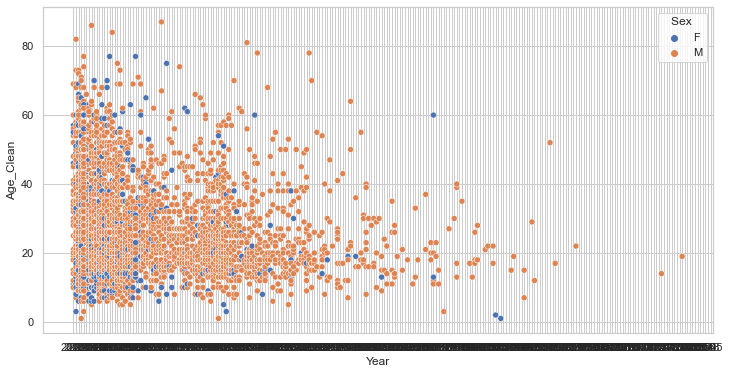

In [73]:
sns.scatterplot(x="Year", y="Age_Clean", hue="Sex ",data=Sharkattack76);

In [74]:
Replace("Year","0005",np.NaN)

C:\Users\Edgard_Cuadra\AppData\Local\Temp\ipykernel_21972\3857129365.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sharkattack76[c] = Sharkattack76[c].replace([s],[o])


In [76]:
Sharkattack76.sort_values(by="Year", ascending=True).sample(5)

Year        Type           Country             Area  \
3092  1979  Unprovoked               Usa          Florida   
1922  2001  Unprovoked               Usa          Florida   
3858  1962  Unprovoked  Marshall Islands  Kwajalein Atoll   
4166  1958     Invalid         Australia  New South Wales   
3205  1975     Invalid               Usa       New Jersey   

                              Location Activity             Name Sex   Age  \
3092     Daytona Beach, Volusia County  Boating   John P. Seiner    M   49   
1922  New Smyrna Beach, Volusia County     Surf  Jaison Valentin    M   19   
3858                  Roi-namur Island  Fishing  Stanley Caberto    M   57   
4166                               NaN  Fishing      Kevin Blair    M   21   
3205       Sandy Hook, Monmouth County  Fishing              NaN    M  NaN   

                                                 Injury Fatal (Y/N)  \
3092                                Lacerations to foot           N   
1922                           Back of left hand gashed           N   
3858                      2.5" laceration on right hand           N   
4166  Disappeared while diving, speargun recovered, ...         NaN   
3205                          "Tooth marks" in left leg         NaN   

                                               Species   \
3092                                                NaN   
1922    3' shark, possibly  a blacktip or spinner shark   
3858                                   1.8 m [6'] shark   
4166  Shark involvement prior to death was not confi...   
3205                      Shark involvement unconfirmed   

                                 Investigator or Source  original order Month  \
3092                  Sarasota Herald Tribune, 8/9/1979          3211.0    08   
1922  S. Petersohn, GSAF; Orlando Sentinel, 8/20/200...          4381.0    08   
3858                               L. R. Fletcher, M.D.          2445.0    01   
4166                       Durban Daily News, 2/20/1958          2137.0    02   
3205            J. Stone; Asbury Park Press, 10/22/1975          3098.0    10   

     Day                        Sharkspe1  Age_Clean  
3092  05                               []       49.0  
1922  18  [(,  shark), (spinner,  shark)]       19.0  
3858  01                     [(,  shark)]       57.0  
4166  19                      [(, Shark)]       21.0  
3205  21                      [(, Shark)]        NaN

In [126]:
Sharkattack76["Year"].unique()

array(['2018', '2017', '2016', '2015', '2013', '2014', nan, '2012',
       '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004',
       '2003', '2002', '2001', '2000', '1999', '1998', '1997', '1996',
       '1995', '1984', '1994', '1993', '1992', '1991', '1990', '1989',
       '1988', '1987', '1986', '1985', '1983', '1982', '1981', '1980',
       '1979', '1978', '1977', '1976', '1975', '1974', '1973', '1972',
       '1971', '1970', '1969', '1968', '1967', '1966', '1965', '1964',
       '1963', '1962', '1961', '1960', '1959', '1958', '1957', '1956',
       '1955', '1954', '1953', '1952', '1951', '1950', '1949', '1948',
       '1947', '1946', '1945', '1944', '1943', '1942', '1941', '1940',
       '1939', '1938', '1937', '1936', '1935', '1934', '1924', '1933',
       '1932', '1931', '1930', '1929', '1928', '1927', '1926', '1925',
       '1923', '1922', '1921', '1920', '1919', '1918', '1917', '1916',
       '1915', '1914', '1913', '1912', '1911', '1910', '1909', '1908',
       '1

#### MADE A COPY of the file to avoid damaging what i have cleaned so far

In [128]:
shark_copy = Sharkattack76.copy()

In [150]:
shark_copy.sample(3)

Year          Type       Country           Area             Location  \
4633  1944  Sea Disaster  Sierra Leone   Western Area             Freetown   
3202  1975    Unprovoked  South Africa  KwaZulu-Natal  South Beach, Durban   
1119  2009      Provoked       Vietnam            NaN                  NaN   

      Activity                  Name Sex   Age  \
4633       NaN          Keith Meaden    M   18   
3202  Standing  Michael van den Berg    M   33   
1119   Fishing          Tran Van Quy    M  NaN   

                                             Injury Fatal (Y/N)  \
4633                                          FATAL           Y   
3202                            Left foot lacerated           N   
1119  Hand bitten by hooked shark PROVOKED INCIDENT           N   

                  Species       Investigator or Source  original order Month  \
4633                   NaN       Royal Navy Casualties          1670.0    11   
3202  Juvenile dusky shark  G. Charter, B. Davis,  NSB          3101.0    11   
1119           White shark   Tin Tuc online, 6/14/2009          5184.0    06   

     Day          Sharkspe1  Age_Clean  
4633  08                 []       18.0  
3202  19  [(dusky,  shark)]       33.0  
1119  14  [(White,  shark)]        NaN

In [157]:
findingnan = shark_copy.dropna(subset=["Year"])
findingnan.isna().count()

Year                      6168
Type                      6168
Country                   6168
Area                      6168
Location                  6168
Activity                  6168
Name                      6168
Sex                       6168
Age                       6168
Injury                    6168
Fatal (Y/N)               6168
Species                   6168
Investigator or Source    6168
original order            6168
Month                     6168
Day                       6168
Sharkspe1                 6168
Age_Clean                 6168
dtype: int64

#### converting the numeric columns to integers

In [181]:
findingnan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6168 entries, 0 to 6173
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    6168 non-null   object 
 1   Type                    6164 non-null   object 
 2   Country                 6123 non-null   object 
 3   Area                    5740 non-null   object 
 4   Location                5665 non-null   object 
 5   Activity                5152 non-null   object 
 6   Name                    5964 non-null   object 
 7   Sex                     5608 non-null   object 
 8   Age                     3456 non-null   object 
 9   Injury                  6141 non-null   object 
 10  Fatal (Y/N)             5630 non-null   object 
 11  Species                 3426 non-null   object 
 12  Investigator or Source  6151 non-null   object 
 13  original order          6168 non-null   float64
 14  Month                   6168 non-null   

In [187]:
findingnan["Year"] = findingnan["Year"].apply(int)

C:\Users\Edgard_Cuadra\AppData\Local\Temp\ipykernel_21972\3834842560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  findingnan["Year"] = findingnan["Year"].apply(int)


In [188]:
findingnan["Day"] = findingnan["Day"].apply(int)

C:\Users\Edgard_Cuadra\AppData\Local\Temp\ipykernel_21972\3487510558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  findingnan["Day"] = findingnan["Day"].apply(int)


In [189]:
findingnan["Month"] = findingnan["Month"].apply(int)

C:\Users\Edgard_Cuadra\AppData\Local\Temp\ipykernel_21972\3866718861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  findingnan["Month"] = findingnan["Month"].apply(int)


In [ ]:
findingnan["Month"] = findingnan["Month"].apply(int)

In [190]:
findingnan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6168 entries, 0 to 6173
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    6168 non-null   int64  
 1   Type                    6164 non-null   object 
 2   Country                 6123 non-null   object 
 3   Area                    5740 non-null   object 
 4   Location                5665 non-null   object 
 5   Activity                5152 non-null   object 
 6   Name                    5964 non-null   object 
 7   Sex                     5608 non-null   object 
 8   Age                     3456 non-null   object 
 9   Injury                  6141 non-null   object 
 10  Fatal (Y/N)             5630 non-null   object 
 11  Species                 3426 non-null   object 
 12  Investigator or Source  6151 non-null   object 
 13  original order          6168 non-null   float64
 14  Month                   6168 non-null   

#### The Histogram bellow display the distribution per every 20 years of the cases reported, it is showing that over the last century the incidents have increased over time, this could be related to the fact that there is more afluency to sea related activities. 

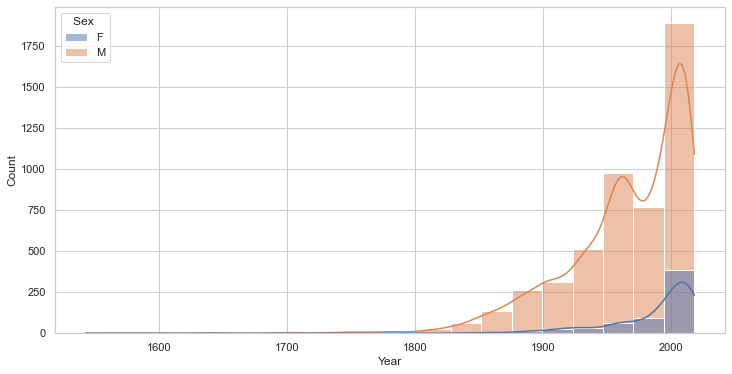

In [201]:
sns.histplot(data=findingnan, x="Year", hue="Sex ", bins=20, kde=True);

#### lests examin the relationship between the time and activities. The graph bellow shows the relationship beteween age and activity of the incidents diferentiated by the sex of the cases. we can observe that since the 1900 some activities have become more frecuent than others. 

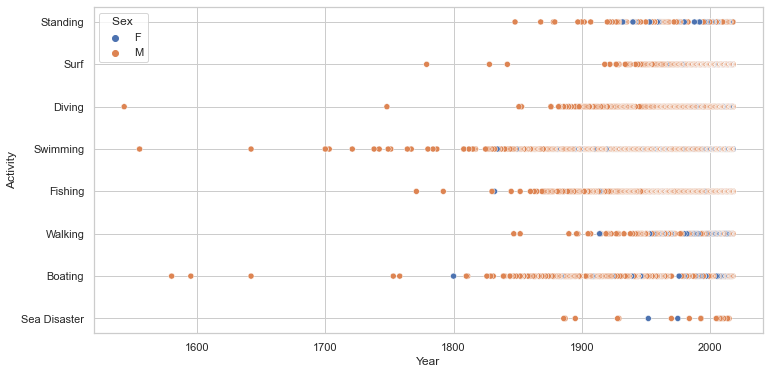

In [203]:
sns.scatterplot(data=findingnan, x="Year",y="Activity", hue="Sex ");

#### Now i want to know what relationship there is between the age of the individual, the activity and the sex of the people. it seems the density of attacks happend to surfers and swimmers the most and in the age groups of 20 to 50 years of age. we should examin the corrolation that there is between this.

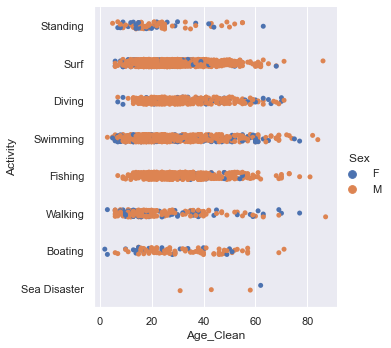

In [220]:
sns.set(rc={"figure.figsize": (150,120)})
sns.catplot(data=findingnan, x="Age_Clean",y="Activity", hue="Sex ");


#### following the logic above we can determin the incidence by age and we can see that there is a clear indication that there is a higher incidence in age groups that are in ages between the 15 years of age to 40, younger having the greater incidence of age attacks.

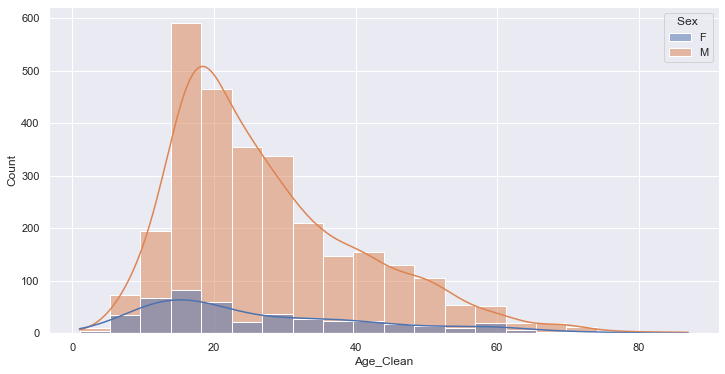

In [222]:
sns.set(rc={"figure.figsize": (12.,6.)})
sns.histplot(data=findingnan, x="Age_Clean", hue="Sex ", bins=20, kde=True);

#### taking into account the age we want to see what activities to avoid depending our age group in order to reduce the risk of getting attacked by sharks, acording to the information provided the highest risk of attacks is by doing Surfing and Swimming if you are between the ages of 15 and 40

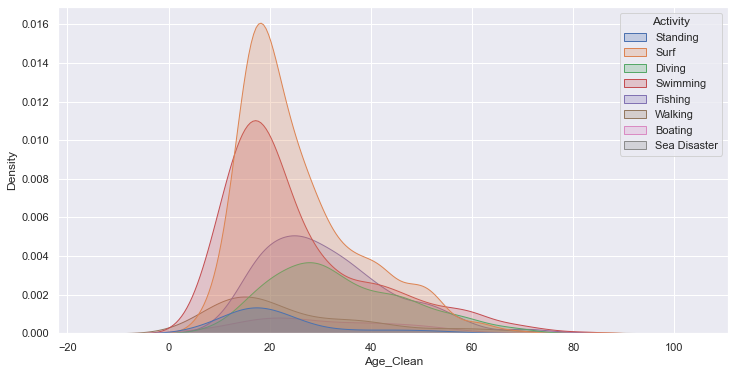

In [224]:
sns.kdeplot(data=findingnan, x="Age_Clean", hue="Activity", fill=True);

#### in the same logic the if we chec the incidence over time, since 1950 surfing has become the most risky activity to do in relation to attacks

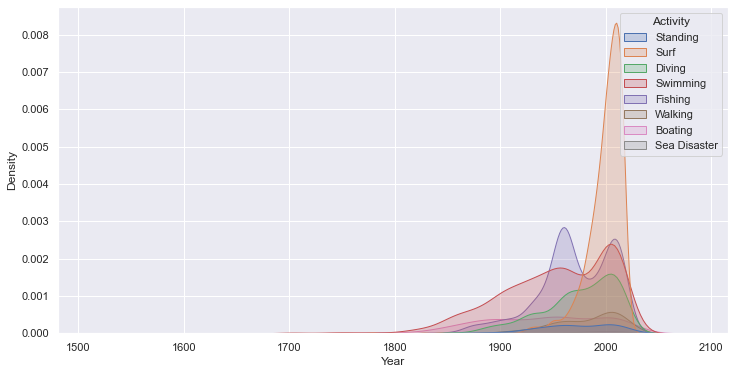

In [238]:
sns.kdeplot(data=findingnan, x="Year", hue="Activity", fill=True);

#### non the less it is not the deadliest activity, according to the fatality density of incidents it seems that swimming is the deadliest activity to be doing at sea if you get attacked by sharks

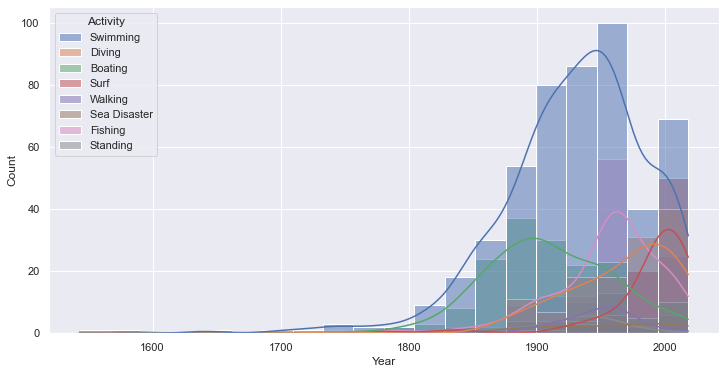

In [239]:
sns.histplot(data=fatalsex, x="Year", hue="Activity", bins=20, kde=True);

#### now i would like to know the know the distribution by country to see if there is a correlation between where the incidents are happening and the type of attacks to understand if there is some areas that are riskier than others, we are gonna analize the 10 most incidential countries of the dataframe

In [229]:
findingnan.Country.value_counts()

Usa                         2212
Australia                   1318
South Africa                 571
Papua New Guinea             130
New Zealand                  125
                            ... 
Maldive Islands                1
North Sea                      1
Red Sea / Indian Ocean         1
British West Indies            1
Between Portugal & India       1
Name: Country, Length: 195, dtype: int64

In [247]:
findingnan.Country.value_counts().head(10)

Usa                 2212
Australia           1318
South Africa         571
Papua New Guinea     130
New Zealand          125
Brazil               112
Bahamas              106
Mexico                89
Italy                 69
Philippines           62
Name: Country, dtype: int64

In [249]:
findingnan.Country.count()

6123

In [255]:
bycountry = findingnan[(findingnan["Country"] =="Usa") | 
             (findingnan["Country"] =="Australia") |
             (findingnan["Country"] =="Papua New Guinea") |
             (findingnan["Country"] =="New Zealand") |
             (findingnan["Country"] =="Brazil") |
             (findingnan["Country"] =="Bahamas") |
             (findingnan["Country"] =="Mexico") |
             (findingnan["Country"] =="Italy") |
             (findingnan["Country"] =="Philippines")] 

In [259]:
bycountry.Country.count()

4223

In [258]:
bycountry.Country.count()/findingnan.Country.count()

0.6896945941531929

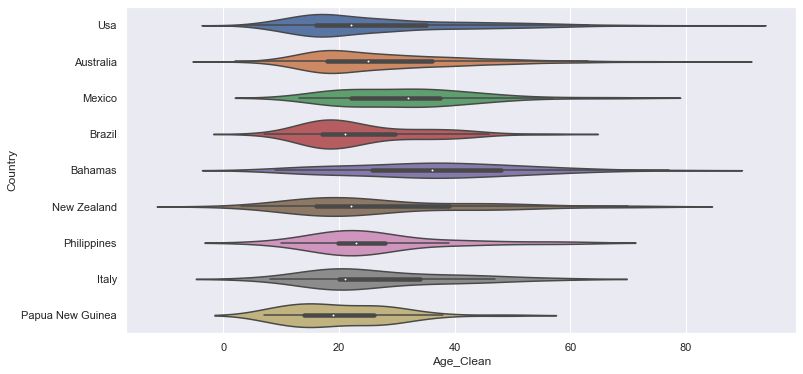

In [262]:
sns.violinplot(data = bycountry,x="Age_Clean", y="Country");

In [265]:
bycountrynan = bycountry.dropna(subset=["Sex ","Activity", "Age_Clean"])
bycountrynan.isna().count()

Year                      2264
Type                      2264
Country                   2264
Area                      2264
Location                  2264
Activity                  2264
Name                      2264
Sex                       2264
Age                       2264
Injury                    2264
Fatal (Y/N)               2264
Species                   2264
Investigator or Source    2264
original order            2264
Month                     2264
Day                       2264
Sharkspe1                 2264
Age_Clean                 2264
dtype: int64

#### in the following graph we can see that there is a clear distiction of incidents per country and sex in some areas its more prominent to be attacke if you are a man 

In [270]:
fig = px.box(bycountrynan, x="Country", y="Age_Clean", color="Sex ", points="all", width=1100, height=600) #Points adds the dots to the left
fig.show()

#### Even thought the there is more incidents in USA they are more lethal in Austrailia, and they are much more deadly for man than for females. should check if there is a corrolation between the sex, country and activity there where doing at the time of the event.

In [272]:
fatalbycountry = fatalsex[(fatalsex["Country"] =="Usa") | 
             (fatalsex["Country"] =="Australia") |
             (fatalsex["Country"] =="Papua New Guinea") |
             (fatalsex["Country"] =="New Zealand") |
             (fatalsex["Country"] =="Brazil") |
             (fatalsex["Country"] =="Bahamas") |
             (fatalsex["Country"] =="Mexico") |
             (fatalsex["Country"] =="Italy") |
             (fatalsex["Country"] =="Philippines")] 

In [274]:
fatalbycountrynan = fatalbycountry.dropna(subset=["Sex ","Activity", "Age_Clean"])

In [276]:
fig = px.box(fatalbycountrynan, x="Country", y="Age_Clean", color="Sex ", points="all", width=1100, height=600) #Points adds the dots to the left
fig.show()

#### since all the variables that i want to use are categorical it giving me an issue of not having a clear distiction of the datas, we need some of the categorical variables to be turned into numerical or counts

In [268]:
fig = px.scatter_matrix(bycountrynan, dimensions=["Age_Clean",'Country',"Activity","Fatal (Y/N)"], color="Sex ",width=1000, height=800) 
fig.show()

#### we can observe that some activities are not common in some contries over the others. the most dangerous activieties are Swimming, surfing and fishing. all present in all thecountries except for sufing that seems that its more frequent USA, Austrailia and New Zeland. next we should check the activity count and fatality by country.

In [277]:
fig = px.scatter_matrix(bycountrynan, dimensions=['Country',"Activity"], color="Sex ",width=1000, height=800) 
fig.show()

In [299]:
countryactivity1 = pd.DataFrame(bycountrynan.groupby(["Country", "Activity"])["Activity"].count())
countryactivity1.head(5)

Activity
Country   Activity          
Australia Boating         21
          Diving         100
          Fishing        104
          Standing        13
          Surf           195

In [300]:
countryactivity2 = pd.DataFrame(bycountrynan.groupby(["Country", "Activity"])["Activity"].count()).unstack()
countryactivity2.head(5)

Activity                                                       \
Activity   Boating Diving Fishing Sea Disaster Standing   Surf Swimming   
Country                                                                   
Australia     21.0  100.0   104.0          NaN     13.0  195.0    182.0   
Bahamas        NaN   21.0    31.0          NaN      2.0    NaN      5.0   
Brazil         NaN    1.0     3.0          NaN      NaN   24.0     26.0   
Italy          1.0    5.0     7.0          NaN      NaN    NaN      6.0   
Mexico         NaN    9.0     4.0          NaN      NaN    9.0     14.0   

                   
Activity  Walking  
Country            
Australia    21.0  
Bahamas       1.0  
Brazil        1.0  
Italy         NaN  
Mexico        3.0

<AxesSubplot:xlabel='Country'>

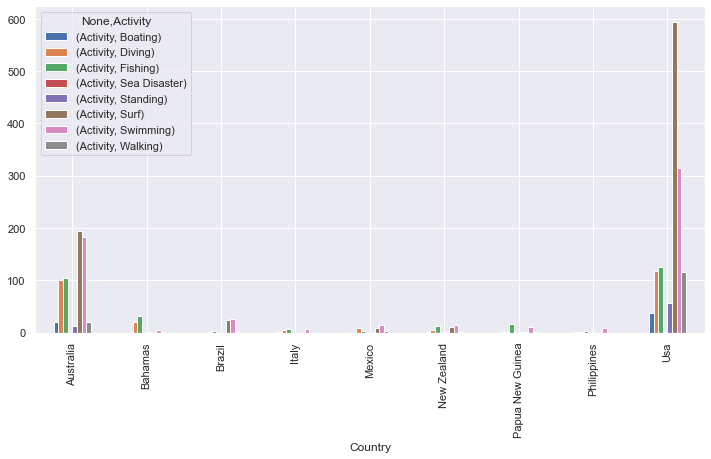

In [324]:
countryactivity2.plot(kind="bar")

In [325]:
countryactivity5 = pd.DataFrame(fatalbycountrynan.groupby(["Country", "Activity"])["Activity"].count()).unstack()
countryactivity5.head(5)

Activity                                                            
Activity   Boating Diving Fishing Sea Disaster Standing  Surf Swimming Walking
Country                                                                       
Australia      6.0   31.0    12.0          NaN      5.0  24.0     78.0     7.0
Bahamas        NaN    1.0     1.0          NaN      NaN   NaN      NaN     NaN
Brazil         NaN    NaN     NaN          NaN      NaN   4.0     12.0     NaN
Italy          NaN    NaN     1.0          NaN      NaN   NaN      3.0     NaN
Mexico         NaN    5.0     1.0          NaN      NaN   4.0      3.0     3.0

<AxesSubplot:xlabel='Country'>

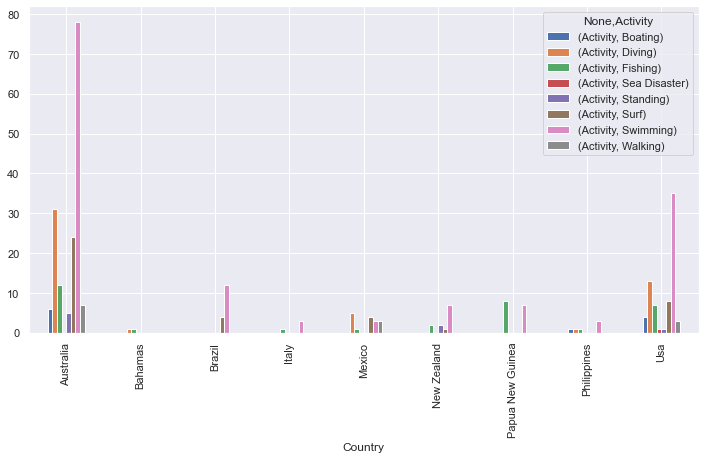

In [326]:
countryactivity5.plot(kind="bar")

In [320]:
countryactivity3 = pd.DataFrame(fatalbycountrynan.groupby(["Country", "Activity","Sex "])["Activity"].count()).unstack()
countryactivity3.head(5)

Activity      
Sex                       F     M
Country   Activity               
Australia Boating       1.0   5.0
          Diving        3.0  28.0
          Fishing       NaN  12.0
          Standing      2.0   3.0
          Surf          1.0  23.0

<AxesSubplot:xlabel='Country,Activity'>

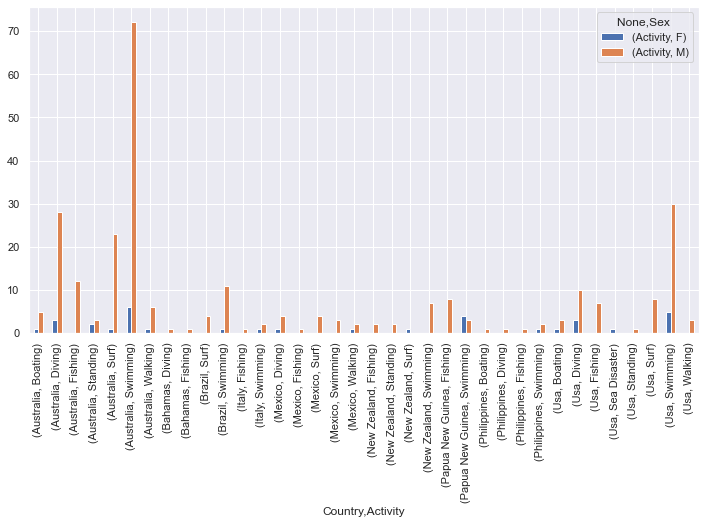

In [321]:
countryactivity3.plot(kind="bar")

In [322]:
countryactivity4 = pd.DataFrame(bycountrynan.groupby(["Country", "Activity","Sex "])["Activity"].count()).unstack()
countryactivity4.head(5)

Activity       
Sex                       F      M
Country   Activity                
Australia Boating       5.0   16.0
          Diving       13.0   87.0
          Fishing       2.0  102.0
          Standing      3.0   10.0
          Surf          8.0  187.0

<AxesSubplot:xlabel='Country,Activity'>

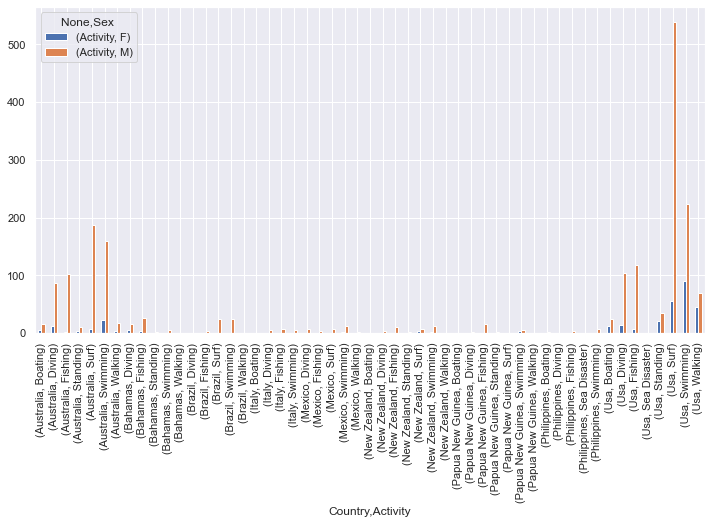

In [323]:
countryactivity4.plot(kind="bar")

C:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

12.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



<AxesSubplot:xlabel='Country', ylabel='Activity'>

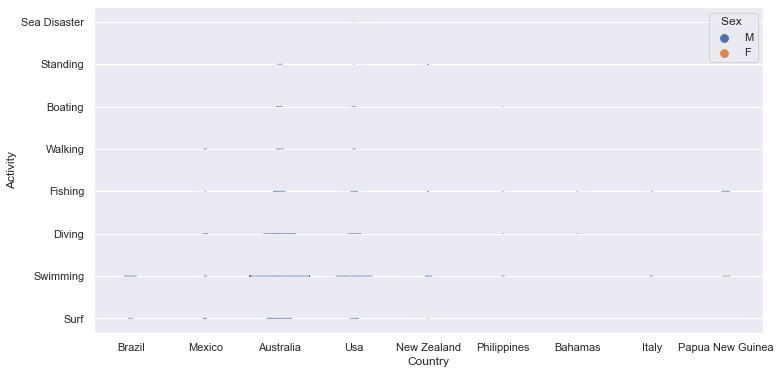

In [340]:
sns.swarmplot(data=fatalbycountrynan, x="Country", y="Activity", hue="Sex ", size=1)

In [343]:
fatalbycountrynansexF = fatalbycountrynan[(fatalbycountrynan["Sex "] =="F")] 

<AxesSubplot:xlabel='Country', ylabel='Activity'>

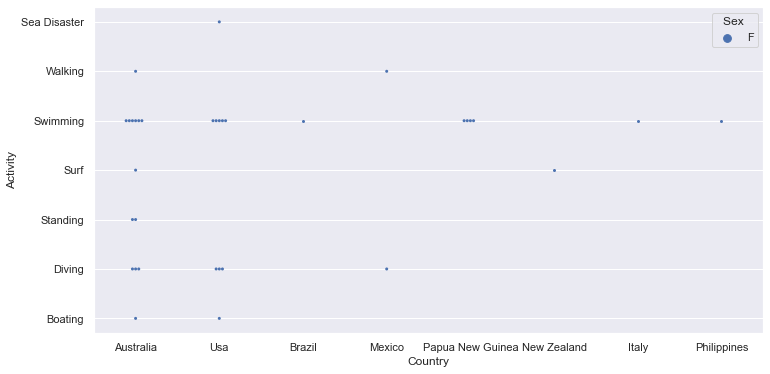

In [347]:
sns.swarmplot(data=fatalbycountrynansexF, x="Country", y="Activity", hue="Sex ", size=3)

In [348]:
fatalbycountrynansexM = fatalbycountrynan[(fatalbycountrynan["Sex "] =="M")] 

C:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

44.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

17.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



<AxesSubplot:xlabel='Country', ylabel='Activity'>

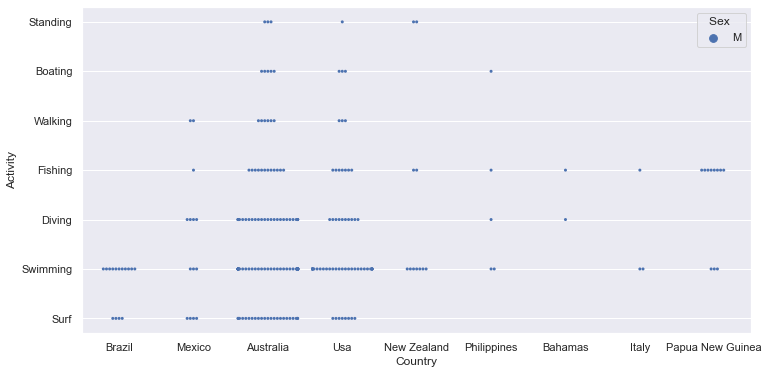

In [349]:
sns.swarmplot(data=fatalbycountrynansexM, x="Country", y="Activity", hue="Sex ", size=3)

#### distribution of fatalities by year, even thought there has been more incidents over the years only a small precentage are fatal and fatalities have declined in the last 60 years

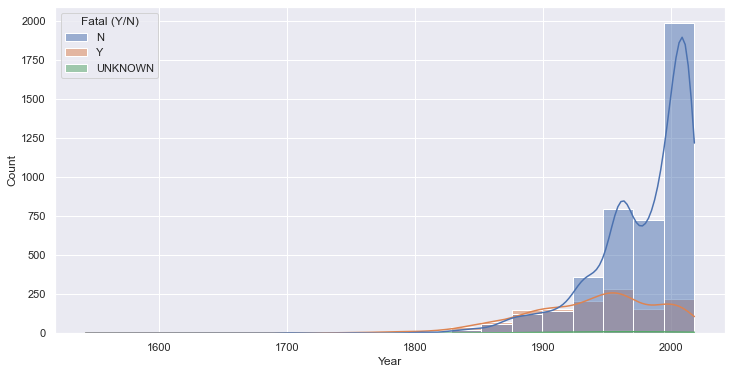

In [351]:
sns.histplot(data=findingnan, x="Year", hue="Fatal (Y/N)", bins=20, kde=True);

In [235]:
# sacaar % de fatalidad y sobrevivir

#### it looks like the fatality rate is lower than expected

In [233]:
fatalsex = findingnan[findingnan["Fatal (Y/N)"] =="Y"]

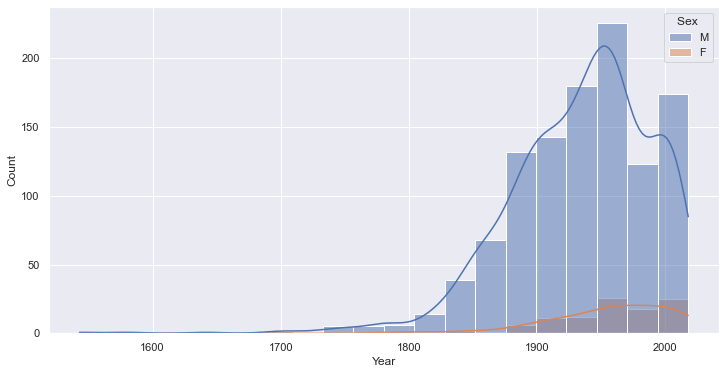

In [234]:
sns.histplot(data=fatalsex, x="Year", hue="Sex ", bins=20, kde=True);

#### what activities are more fatal for man and woman and what age are the distribution of this fatalities.

In [241]:
fatalact = fatalsex.dropna(subset=["Sex ","Activity", "Age_Clean"])
fatalact.isna().count()

Year                      537
Type                      537
Country                   537
Area                      537
Location                  537
Activity                  537
Name                      537
Sex                       537
Age                       537
Injury                    537
Fatal (Y/N)               537
Species                   537
Investigator or Source    537
original order            537
Month                     537
Day                       537
Sharkspe1                 537
Age_Clean                 537
dtype: int64

In [242]:
fig = px.box(fatalact, x="Activity", y="Age_Clean", color="Sex ", points="all", width=1100, height=600) #Points adds the dots to the left
fig.show()

In [243]:
attacksactivity = findingnan.dropna(subset=["Sex ","Activity", "Age_Clean"])
attacksactivity.isna().count()

Year                      3080
Type                      3080
Country                   3080
Area                      3080
Location                  3080
Activity                  3080
Name                      3080
Sex                       3080
Age                       3080
Injury                    3080
Fatal (Y/N)               3080
Species                   3080
Investigator or Source    3080
original order            3080
Month                     3080
Day                       3080
Sharkspe1                 3080
Age_Clean                 3080
dtype: int64

#### what activities you are more likely to be attacked overall (weather deadly or not) for man and woman and what age are the distribution of this fatalities.

In [244]:
fig = px.box(attacksactivity, x="Activity", y="Age_Clean", color="Sex ", points="all", width=1100, height=600) #Points adds the dots to the left
fig.show()